In [530]:
import tensorflow as tf
import pandas as pd
import numpy as np

from keras.models import Model, Sequential
from keras.layers import Input, LSTM, Dense, Dropout


In [498]:
deklinacije = pd.read_csv('deklinacije.csv')
deklinacije.head(10)


,j_nominativ,rod,j_genitiv,j_dativ,j_akuzativ,j_vokativ,j_lokativ,j_instrumental,m_nominativ,m_genitiv,m_dativ,m_akuzativ,m_vokativ,m_lokativ,m_instrumental
0,abdomen,muški,abdomena,abdomenu,abdomen,abdomen,abdomenu,abdomenom,abdomeni,abdomena,abdomenima,abdomena,abdomeni,abdomenima,abdomenima
1,abolicija,ženski,abolicije,aboliciji,aboliciju,abolicijo,aboliciji,abolicijom,abolicije,abolicija,abolicijama,abolicije,abolicije,abolicijama,abolicijama
2,abonent,muški,abonenta,abonentu,abonenta,abonente,abonentu,abonentom,abonenti,abonenata,abonentima,abonente,abonenti,abonentima,abonentima
3,abortus,muški,abortusa,abortusu,abortus,abortuse,abortusu,abortusom,abortusi,abortusa,abortusima,abortuse,abortusi,abortusima,abortusima
4,Afrikanka,ženski,Afrikanke,Afrikanki,Afrikanke,Afrikanko,Afrikanko,Afrikankom,Afrikanke,Afrikanki,Afrikankama,Afrikanke,Afrikanke,Afrikankama,Afrikankama
5,ada,ženski,ade,adi,adu,ado,adi,adom,ade,ada,adama,ade,ade,adama,adama
6,adamit,muški,adamita,adamitu,adamita,adamitu,adamitu,adamitom,adamiti,adamita,adamitima,adamite,adamiti,adamitima,adamitima
7,administracija,ženski,administracije,administraciji,administraciju,administracijo,administraciji,administracijom,administracije,administracija,administracijama,administracije,administracije,administracijama,administracijama
8,adresa,ženski,adrese,adresi,adresu,adreso,adresi,adresom,adrese,adresa,adresama,adrese,adrese,adresama,adresama
9,advokat,muški,advokata,advokatu,advokata,advokate,advokatu,advokatom,advokati,advokata,advokatima,advokate,advokati,advokatima,advokatima


In [409]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=28, char_level = True)
tokenizer.fit_on_texts(deklinacije.j_nominativ.str.lower())
dictionary = tokenizer.word_index

dictionary


{'a': 1,
 'i': 2,
 'o': 3,
 't': 4,
 'r': 5,
 'e': 6,
 'n': 7,
 'j': 8,
 'k': 9,
 'l': 10,
 's': 11,
 'u': 12,
 'p': 13,
 'd': 14,
 'm': 15,
 'v': 16,
 'b': 17,
 'g': 18,
 'c': 19,
 'z': 20,
 'č': 21,
 'f': 22,
 'h': 23,
 'š': 24,
 'ž': 25,
 'ć': 26,
 'đ': 27,
 '-': 28}

In [414]:
# input and output definition
tokenizer2 = Tokenizer(num_words=28, char_level = True)
tokenizer2.fit_on_texts(deklinacije.j_nominativ.str.lower())
X = tokenizer2.texts_to_sequences(deklinacije.j_nominativ.str.lower())
Y = tokenizer2.texts_to_sequences(deklinacije.j_genitiv.str.lower())
X[:10]

[[1, 17, 14, 3, 15, 6, 7],
 [1, 17, 3, 10, 2, 19, 2, 8, 1],
 [1, 17, 3, 7, 6, 7, 4],
 [1, 17, 3, 5, 4, 12, 11],
 [1, 22, 5, 2, 9, 1, 7, 9, 1],
 [1, 14, 1],
 [1, 14, 1, 15, 2, 4],
 [1, 14, 15, 2, 7, 2, 11, 4, 5, 1, 19, 2, 8, 1],
 [1, 14, 5, 6, 11, 1],
 [1, 14, 16, 3, 9, 1, 4]]

In [415]:
dictionary = tokenizer2.word_index
dictionary

{'a': 1,
 'i': 2,
 'o': 3,
 't': 4,
 'r': 5,
 'e': 6,
 'n': 7,
 'j': 8,
 'k': 9,
 'l': 10,
 's': 11,
 'u': 12,
 'p': 13,
 'd': 14,
 'm': 15,
 'v': 16,
 'b': 17,
 'g': 18,
 'c': 19,
 'z': 20,
 'č': 21,
 'f': 22,
 'h': 23,
 'š': 24,
 'ž': 25,
 'ć': 26,
 'đ': 27,
 '-': 28}

In [419]:
# creating traing, validation and test dataset 
from sklearn.model_selection import train_test_split

X_train_enc, X_test_enc, Y_train_enc, Y_test_enc = train_test_split(X, Y, test_size=0.33, random_state=342)
X_train_enc, X_val_enc, Y_train_enc, Y_val_enc = train_test_split(X_train_enc, Y_train_enc, test_size=0.1, random_state=777)

type(X_train_enc)
print("Shape of x_train:", X_train.shape)
print("Shape of x_val:", X_val.shape)
print("Shape of x_test:", X_test.shape)

print("Shape of y_train:", Y_train.shape)
print("Shape of y_val:", Y_val.shape)
print("Shape of y_test:", Y_test.shape)

Shape of x_train: (1224, 22, 28)
Shape of x_val: (137, 22, 28)
Shape of x_test: (671, 22, 28)
Shape of y_train: (1224, 22, 28)
Shape of y_val: (137, 22, 28)
Shape of y_test: (671, 22, 28)


In [420]:
MAX_LENGTH = 0
for column in deklinacije:
    max_col = deklinacije[column].str.len().max()
    if max_col > MAX_LENGTH:
        MAX_LENGTH = max_col
MAX_LENGTH   

22

In [421]:
# padding
from keras.preprocessing.sequence import pad_sequences
X_train_enc_pad = pad_sequences(X_train_enc, maxlen=MAX_LENGTH, dtype='int32', padding='post', truncating='post')
X_test_enc_pad = pad_sequences(X_test_enc, maxlen=MAX_LENGTH, dtype='int32', padding='post', truncating='post')
X_val_enc_pad = pad_sequences(X_val_enc, maxlen=MAX_LENGTH, dtype='int32', padding='post', truncating='post')

Y_train_enc_pad = pad_sequences(Y_train_enc, maxlen=MAX_LENGTH, dtype='int32', padding='post', truncating='post')
Y_test_enc_pad = pad_sequences(Y_test_enc, maxlen=MAX_LENGTH, dtype='int32', padding='post', truncating='post')
Y_val_enc_pad = pad_sequences(Y_val_enc, maxlen=MAX_LENGTH, dtype='int32', padding='post', truncating='post')


In [422]:
print(X_train_enc_pad[0])
print(X_train_enc_pad[1])
print(X_train_enc_pad[2])


[ 7  6 16  3 10  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[25 14  5  2  8  6 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 9  3 20  1 13  5 11  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [426]:
# one-hot encoding
from keras.utils import to_categorical

X_train = to_categorical(X_train_enc_pad)
X_test = to_categorical(X_test_enc_pad)
X_val = to_categorical(X_val_enc_pad)

Y_train = to_categorical(Y_train_enc_pad)
Y_test = to_categorical(Y_test_enc_pad)
Y_val = to_categorical(Y_val_enc_pad)

X_train[0][0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [437]:
print(dictionary)
inversed_dictionary = {v: k for k, v in dictionary.items()}
print(inversed_dictionary)

{'a': 1, 'i': 2, 'o': 3, 't': 4, 'r': 5, 'e': 6, 'n': 7, 'j': 8, 'k': 9, 'l': 10, 's': 11, 'u': 12, 'p': 13, 'd': 14, 'm': 15, 'v': 16, 'b': 17, 'g': 18, 'c': 19, 'z': 20, 'č': 21, 'f': 22, 'h': 23, 'š': 24, 'ž': 25, 'ć': 26, 'đ': 27, '-': 28}
{1: 'a', 2: 'i', 3: 'o', 4: 't', 5: 'r', 6: 'e', 7: 'n', 8: 'j', 9: 'k', 10: 'l', 11: 's', 12: 'u', 13: 'p', 14: 'd', 15: 'm', 16: 'v', 17: 'b', 18: 'g', 19: 'c', 20: 'z', 21: 'č', 22: 'f', 23: 'h', 24: 'š', 25: 'ž', 26: 'ć', 27: 'đ', 28: '-'}


In [531]:
# DEKODIRANJE - RADI ! 

print("ORIGINAL: ", + X_train_enc_pad[0])
print("ONE_HOT ENCODING - 1. znak: ", X_train[0][0])
print("DEKODIRANO - 1. znak:", argmax(X_train[0][0]))

for j in range (len(X_train)):
    print("ZAPIS: ", j, " DUŽINA: ", len(X_train[j]), " ", end='')
    for i in range (len(X_train[j])):
        int_code = argmax(X_train[j][i])
        #print(int_code, "|", end = '')
        if (int_code != 0):
            print(inversed_dictionary[int_code], end = '')
    print()

ORIGINAL:  [ 7  6 16  3 10  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
ONE_HOT ENCODING - 1. znak:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
DEKODIRANO - 1. znak: 7
ZAPIS:  0  DUŽINA:  22  nevolja
ZAPIS:  1  DUŽINA:  22  ždrijeb
ZAPIS:  2  DUŽINA:  22  kozaprst
ZAPIS:  3  DUŽINA:  22  odmor
ZAPIS:  4  DUŽINA:  22  obmana
ZAPIS:  5  DUŽINA:  22  akrobacija
ZAPIS:  6  DUŽINA:  22  fonolog
ZAPIS:  7  DUŽINA:  22  anortit
ZAPIS:  8  DUŽINA:  22  embriologija
ZAPIS:  9  DUŽINA:  22  morfologija
ZAPIS:  10  DUŽINA:  22  talij
ZAPIS:  11  DUŽINA:  22  akustika
ZAPIS:  12  DUŽINA:  22  orkan
ZAPIS:  13  DUŽINA:  22  došašće
ZAPIS:  14  DUŽINA:  22  šljiva
ZAPIS:  15  DUŽINA:  22  nabavnica
ZAPIS:  16  DUŽINA:  22  violončelo
ZAPIS:  17  DUŽINA:  22  vjera
ZAPIS:  18  DUŽINA:  22  hiperbola
ZAPIS:  19  DUŽINA:  22  nagrada
ZAPIS:  20  DUŽINA:  22  ajnštajnij
ZAPIS:  21  DUŽINA:  22  kasa
ZAPIS:  22  DUŽINA:  22  jaz
ZAPIS:  23  DUŽINA:  22  

ZAPIS:  265  DUŽINA:  22  dalmatinac
ZAPIS:  266  DUŽINA:  22  tor
ZAPIS:  267  DUŽINA:  22  naranča
ZAPIS:  268  DUŽINA:  22  strana
ZAPIS:  269  DUŽINA:  22  metamorfit
ZAPIS:  270  DUŽINA:  22  koljeno
ZAPIS:  271  DUŽINA:  22  vrpca
ZAPIS:  272  DUŽINA:  22  jesen
ZAPIS:  273  DUŽINA:  22  gad
ZAPIS:  274  DUŽINA:  22  protuletnjak
ZAPIS:  275  DUŽINA:  22  ununtrij
ZAPIS:  276  DUŽINA:  22  andrić
ZAPIS:  277  DUŽINA:  22  budala
ZAPIS:  278  DUŽINA:  22  troskok
ZAPIS:  279  DUŽINA:  22  ispit
ZAPIS:  280  DUŽINA:  22  bačva
ZAPIS:  281  DUŽINA:  22  podnožje
ZAPIS:  282  DUŽINA:  22  mazohist
ZAPIS:  283  DUŽINA:  22  hidroksid
ZAPIS:  284  DUŽINA:  22  nastup
ZAPIS:  285  DUŽINA:  22  otac
ZAPIS:  286  DUŽINA:  22  ton
ZAPIS:  287  DUŽINA:  22  onomatopeja
ZAPIS:  288  DUŽINA:  22  učenik
ZAPIS:  289  DUŽINA:  22  unnilheksij
ZAPIS:  290  DUŽINA:  22  pevac
ZAPIS:  291  DUŽINA:  22  indij
ZAPIS:  292  DUŽINA:  22  spomenik
ZAPIS:  293  DUŽINA:  22  evolucija
ZAPIS:  294  DUŽINA

ZAPIS:  532  DUŽINA:  22  sumporovodik
ZAPIS:  533  DUŽINA:  22  sitničar
ZAPIS:  534  DUŽINA:  22  meitnerij
ZAPIS:  535  DUŽINA:  22  šipak
ZAPIS:  536  DUŽINA:  22  naknada
ZAPIS:  537  DUŽINA:  22  krma
ZAPIS:  538  DUŽINA:  22  izgled
ZAPIS:  539  DUŽINA:  22  navada
ZAPIS:  540  DUŽINA:  22  žal
ZAPIS:  541  DUŽINA:  22  odlazak
ZAPIS:  542  DUŽINA:  22  gospodar
ZAPIS:  543  DUŽINA:  22  žirovina
ZAPIS:  544  DUŽINA:  22  nafta
ZAPIS:  545  DUŽINA:  22  roditelj
ZAPIS:  546  DUŽINA:  22  aluminij
ZAPIS:  547  DUŽINA:  22  sila
ZAPIS:  548  DUŽINA:  22  modulator
ZAPIS:  549  DUŽINA:  22  stečevina
ZAPIS:  550  DUŽINA:  22  jakovčak
ZAPIS:  551  DUŽINA:  22  unheksnilij
ZAPIS:  552  DUŽINA:  22  tisuća
ZAPIS:  553  DUŽINA:  22  ksenon
ZAPIS:  554  DUŽINA:  22  red
ZAPIS:  555  DUŽINA:  22  ovca
ZAPIS:  556  DUŽINA:  22  gejzerit
ZAPIS:  557  DUŽINA:  22  obavijest
ZAPIS:  558  DUŽINA:  22  obračun
ZAPIS:  559  DUŽINA:  22  evidencija
ZAPIS:  560  DUŽINA:  22  život
ZAPIS:  561  D

ZAPIS:  803  DUŽINA:  22  asortiman
ZAPIS:  804  DUŽINA:  22  desetoboj
ZAPIS:  805  DUŽINA:  22  vapnik
ZAPIS:  806  DUŽINA:  22  koža
ZAPIS:  807  DUŽINA:  22  kost
ZAPIS:  808  DUŽINA:  22  vodoskok
ZAPIS:  809  DUŽINA:  22  lokal
ZAPIS:  810  DUŽINA:  22  veo
ZAPIS:  811  DUŽINA:  22  nezosilikat
ZAPIS:  812  DUŽINA:  22  litota
ZAPIS:  813  DUŽINA:  22  vid
ZAPIS:  814  DUŽINA:  22  jajce
ZAPIS:  815  DUŽINA:  22  lav
ZAPIS:  816  DUŽINA:  22  telur
ZAPIS:  817  DUŽINA:  22  poruka
ZAPIS:  818  DUŽINA:  22  trgovac
ZAPIS:  819  DUŽINA:  22  činčila
ZAPIS:  820  DUŽINA:  22  maškara
ZAPIS:  821  DUŽINA:  22  mat
ZAPIS:  822  DUŽINA:  22  osoba
ZAPIS:  823  DUŽINA:  22  kuna
ZAPIS:  824  DUŽINA:  22  napitak
ZAPIS:  825  DUŽINA:  22  vukopis
ZAPIS:  826  DUŽINA:  22  socijalizam
ZAPIS:  827  DUŽINA:  22  sintagma
ZAPIS:  828  DUŽINA:  22  učinkovitost
ZAPIS:  829  DUŽINA:  22  sericit
ZAPIS:  830  DUŽINA:  22  fermij
ZAPIS:  831  DUŽINA:  22  andezin
ZAPIS:  832  DUŽINA:  22  tijest

ZAPIS:  1074  DUŽINA:  22  talent
ZAPIS:  1075  DUŽINA:  22  pijetao
ZAPIS:  1076  DUŽINA:  22  presuda
ZAPIS:  1077  DUŽINA:  22  organizam
ZAPIS:  1078  DUŽINA:  22  dunit
ZAPIS:  1079  DUŽINA:  22  majica
ZAPIS:  1080  DUŽINA:  22  uvreda
ZAPIS:  1081  DUŽINA:  22  promjer
ZAPIS:  1082  DUŽINA:  22  silicij
ZAPIS:  1083  DUŽINA:  22  geofizika
ZAPIS:  1084  DUŽINA:  22  višesložica
ZAPIS:  1085  DUŽINA:  22  dioksid
ZAPIS:  1086  DUŽINA:  22  bosanka
ZAPIS:  1087  DUŽINA:  22  kompjuter
ZAPIS:  1088  DUŽINA:  22  afrikanka
ZAPIS:  1089  DUŽINA:  22  pedagogija
ZAPIS:  1090  DUŽINA:  22  zatvorenik
ZAPIS:  1091  DUŽINA:  22  klerik
ZAPIS:  1092  DUŽINA:  22  ledac
ZAPIS:  1093  DUŽINA:  22  element
ZAPIS:  1094  DUŽINA:  22  hod
ZAPIS:  1095  DUŽINA:  22  piće
ZAPIS:  1096  DUŽINA:  22  lipanj
ZAPIS:  1097  DUŽINA:  22  trenutak
ZAPIS:  1098  DUŽINA:  22  krov
ZAPIS:  1099  DUŽINA:  22  milonit
ZAPIS:  1100  DUŽINA:  22  pero
ZAPIS:  1101  DUŽINA:  22  samovoz
ZAPIS:  1102  DUŽINA:  

In [532]:
print("Shape of x_train:",X_train.shape)
print("Shape of x_val:",X_val.shape)
print("Shape of x_test:",X_test.shape)
print("Shape of y_train:",Y_train.shape)
print("Shape of y_val:",Y_val.shape)
print("Shape of y_test:",Y_test.shape)

Shape of x_train: (1224, 22, 28)
Shape of x_val: (137, 22, 28)
Shape of x_test: (671, 22, 28)
Shape of y_train: (1224, 22, 28)
Shape of y_val: (137, 22, 28)
Shape of y_test: (671, 22, 28)


In [533]:
# alt_X_train = X_train.reshape(1224, 22 * 28)
# alt_X_val = X_val.reshape(137, 22 * 28)
# alt_X_test = X_test.reshape(671, 22 * 28)
# alt_Y_train = Y_train.reshape(1224, 22 * 28)
# alt_Y_val = Y_val.reshape(137, 22 * 28)
# alt_Y_test = Y_test.reshape(671, 22 * 28)

# print(alt_X_train.shape)
# print(alt_X_val.shape)
# print(alt_X_test.shape)
# print(alt_Y_train.shape)
# print(alt_Y_val.shape)
# print(alt_Y_test.shape)

In [544]:
# RADI, ALI SU VRIJEDNOSTI FLOAT, A TREBAJU BITI 1 ili 0

model = Sequential()
model.add(LSTM(28, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='softmax'))  #, return_sequences=True
# model.add(Dropout(0.2))
# softmax zbog one-hot-encodinga
# sigmoid za binarni rezulat
model.add(LSTM(28, activation='softmax', return_sequences=True, recurrent_activation="sigmoid"))          #, return_sequences=False
model.add(Dense(28, activation='sigmoid'))
#model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])    # binary_crossentropy | categorical_crossentropy
history = model.fit(X_train, Y_train,
          epochs=20,
          batch_size=128, 
          validation_data = (X_val,Y_val)
         )


Train on 1224 samples, validate on 137 samples
Epoch 1/20
1224/1224 [==============================] - 8s 6ms/step - loss: 0.6872 - acc: 0.7557 - val_loss: 0.6811 - val_acc: 0.9417
Epoch 2/20
1224/1224 [==============================] - 0s 215us/step - loss: 0.6777 - acc: 0.9715 - val_loss: 0.6732 - val_acc: 0.9757
Epoch 3/20
1224/1224 [==============================] - 0s 212us/step - loss: 0.6700 - acc: 0.9751 - val_loss: 0.6658 - val_acc: 0.9757
Epoch 4/20
1224/1224 [==============================] - 0s 209us/step - loss: 0.6628 - acc: 0.9751 - val_loss: 0.6587 - val_acc: 0.9757
Epoch 5/20
1224/1224 [==============================] - 0s 213us/step - loss: 0.6558 - acc: 0.9751 - val_loss: 0.6517 - val_acc: 0.9757
Epoch 6/20
1224/1224 [==============================] - 0s 208us/step - loss: 0.6487 - acc: 0.9751 - val_loss: 0.6446 - val_acc: 0.9757
Epoch 7/20
1224/1224 [==============================] - 0s 210us/step - loss: 0.6417 - acc: 0.9751 - val_loss: 0.6376 - val_acc: 0.9757
Epo

In [545]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_153 (LSTM)              (None, 22, 28)            6384      
_________________________________________________________________
lstm_154 (LSTM)              (None, 22, 28)            6384      
_________________________________________________________________
dense_110 (Dense)            (None, 22, 28)            812       
Total params: 13,580
Trainable params: 13,580
Non-trainable params: 0
_________________________________________________________________


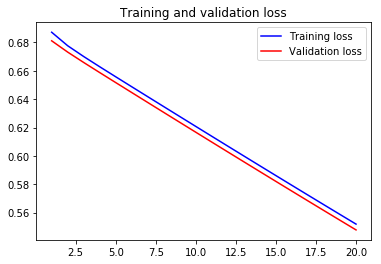

In [546]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [547]:
X_test.shape

(671, 22, 28)

In [548]:
predict_word = model.predict(X_test[:10], verbose=0)

for j in range (len(predict_word)):
    print("ZAPIS: ", j, " DUŽINA: ", len(predict_word[j]), " ", end='')
    for i in range (len(predict_word[j])):
        print(argmax(predict_word[j][i]), end = '')
    print()


print("-------------------------------------")

for j in range (len(predict_word)):
    print("ZAPIS: ", j, " DUŽINA: ", len(predict_word[j]), " ", end='')
    for i in range (len(predict_word[j])):
        print(predict_word[j][i], end = '')
    print()
    
# for i in range(predict_word[0][:5]):
#     zapis = predict_word[i]
#     print('index: %d' % i)
#     #print('Encoded: %s' % zapis)
#     decoded_zapis = np.argmax(predict_word[i])
#     print('Decoded: %s' % decoded_zapis)
#     print()
    


ZAPIS:  0  DUŽINA:  22  0000000000000000000000
ZAPIS:  1  DUŽINA:  22  0000000000000000000000
ZAPIS:  2  DUŽINA:  22  0000000000000000000000
ZAPIS:  3  DUŽINA:  22  0000000000000000000000
ZAPIS:  4  DUŽINA:  22  0000000000000000000000
ZAPIS:  5  DUŽINA:  22  0000000000000000000000
ZAPIS:  6  DUŽINA:  22  0000000000000000000000
ZAPIS:  7  DUŽINA:  22  0000000000000000000000
ZAPIS:  8  DUŽINA:  22  0000000000000000000000
ZAPIS:  9  DUŽINA:  22  0000000000000000000000
-------------------------------------
ZAPIS:  0  DUŽINA:  22  [0.5826852  0.42405558 0.42048743 0.41398    0.425908   0.4192267
 0.4133946  0.41803166 0.4172448  0.42309627 0.4156795  0.419433
 0.416399   0.41344917 0.4158144  0.4196655  0.42249662 0.42083743
 0.42371705 0.41620597 0.41855162 0.42147878 0.41726097 0.41544187
 0.42190933 0.42433727 0.42017445 0.409134  ][0.5842657  0.4228464  0.41903406 0.41235432 0.42476133 0.41782877
 0.41161612 0.4165     0.415777   0.42182064 0.41404086 0.41801238
 0.4147114  0.4116841  0